In [1]:
import json

def get_dataset(dataset_string):
  with open(dataset_string, 'r') as file:
      data = json.load(file)
  return data

In [4]:
from llms.llm_interaction import GeminiClient, OpenAIClient, GroqClient

gemini_client = GeminiClient(model="gemini-2.0-flash-001")
openai_client = OpenAIClient(model="gpt-4o")
groq_client = GroqClient(model="llama-3.3-70b-versatile")



Gemini client initialized with model: gemini-2.0-flash-001
OpenAI client initialized with model: gpt-4o
Groq client initialized with model: llama-3.3-70b-versatile


In [6]:
from approaches.approach2 import approach2_base, approach2_annotate
full_dataset = get_dataset('datasets/patient_records4.json')

In [5]:

subset = full_dataset[6:8]

In [24]:
print("gemini results")
print("="*100)
gemini_res_base = approach2_base(subset, gemini_client, order_sensitive=False, verbose=True)
print("manual extraction")
print("="*100)
gemini_res_annotate_manual = approach2_annotate(subset, gemini_client, order_sensitive=False, verbose=True, manual_extraction=True)
print("auto extraction")
print("="*100)
gemini_res_annotate_auto = approach2_annotate(subset, gemini_client, order_sensitive=False, verbose=True, manual_extraction=False)


gemini results
Processing 2 records...

Patient Record:
ADMISSION DIAGNOSIS
The patient, a 62-year-old male retired construction worker, was admitted to the hospital with a diagnosis of severe hypoglycemia. He has a history of type 2 diabetes and was taking metformin and glyburide.

HISTORY OF PRESENT ILLNESS
The patient reported that he had been feeling ill for the past two days with symptoms of confusion, dizziness, and Shakiness. He had been skipping meals due to a recent episode of gastritis, which led to a significant decrease in his blood glucose levels. The patient's wife stated that he became unresponsive while watching television, prompting her to call emergency services.

PAST MEDICAL HISTORY
The patient's medical history is significant for hypertension, hyperlipidemia, and diabetic nephropathy. He has a history of smoking and had a myocardial infarction 10 years ago. The patient's diabetes is currently managed by his primary care physician, and his glycosylated hemoglobin (H

In [25]:
print("openai results")
print("="*100)
openai_res_base = approach2_base(subset, openai_client, order_sensitive=False, verbose=True)
print("manual extraction")
print("="*100)
openai_res_annotate_manual = approach2_annotate(subset, openai_client, order_sensitive=False, verbose=True, manual_extraction=True)
print("auto extraction")
print("="*100)
openai_res_annotate_auto = approach2_annotate(subset, openai_client, order_sensitive=False, verbose=True, manual_extraction=False)

openai results
Processing 2 records...

Patient Record:
ADMISSION DIAGNOSIS
The patient, a 62-year-old male retired construction worker, was admitted to the hospital with a diagnosis of severe hypoglycemia. He has a history of type 2 diabetes and was taking metformin and glyburide.

HISTORY OF PRESENT ILLNESS
The patient reported that he had been feeling ill for the past two days with symptoms of confusion, dizziness, and Shakiness. He had been skipping meals due to a recent episode of gastritis, which led to a significant decrease in his blood glucose levels. The patient's wife stated that he became unresponsive while watching television, prompting her to call emergency services.

PAST MEDICAL HISTORY
The patient's medical history is significant for hypertension, hyperlipidemia, and diabetic nephropathy. He has a history of smoking and had a myocardial infarction 10 years ago. The patient's diabetes is currently managed by his primary care physician, and his glycosylated hemoglobin (H

In [26]:
print("groq results")
print("="*100)
groq_res_base = approach2_base(subset, groq_client, order_sensitive=False, verbose=True)
print("manual extraction")
print("="*100)
groq_res_annotate_manual = approach2_annotate(subset, groq_client, order_sensitive=False, verbose=True, manual_extraction=True)
print("auto extraction")
print("="*100)
groq_res_annotate_auto = approach2_annotate(subset, groq_client, order_sensitive=False, verbose=True, manual_extraction=False)

groq results
Processing 2 records...

Patient Record:
ADMISSION DIAGNOSIS
The patient, a 62-year-old male retired construction worker, was admitted to the hospital with a diagnosis of severe hypoglycemia. He has a history of type 2 diabetes and was taking metformin and glyburide.

HISTORY OF PRESENT ILLNESS
The patient reported that he had been feeling ill for the past two days with symptoms of confusion, dizziness, and Shakiness. He had been skipping meals due to a recent episode of gastritis, which led to a significant decrease in his blood glucose levels. The patient's wife stated that he became unresponsive while watching television, prompting her to call emergency services.

PAST MEDICAL HISTORY
The patient's medical history is significant for hypertension, hyperlipidemia, and diabetic nephropathy. He has a history of smoking and had a myocardial infarction 10 years ago. The patient's diabetes is currently managed by his primary care physician, and his glycosylated hemoglobin (HbA

In [10]:
subset2 = full_dataset[0:10]

for llm_client in [ gemini_client, openai_client, groq_client]:
  print("="*100)
  print(f"{llm_client.model} results")
  print("="*100)
  res_base = approach2_base(subset2, llm_client, order_sensitive=False, verbose=False)
  print("manual extraction")
  print("="*100)
  res_annotate_manual = approach2_annotate(subset2, llm_client, order_sensitive=False, verbose=False, manual_extraction=True)
  print("auto extraction")
  print("="*100)
  res_annotate_auto = approach2_annotate(subset2, llm_client, order_sensitive=False, verbose=False, manual_extraction=False)

gemini-2.0-flash-001 results
Processing 10 records...

Patient Record:
A 75-year-old male retired accountant was admitted to the hospital with a diagnosis of acute myocardial infarction due to complete occlusion of the lateral wall of the left ventricle after recent complaints of persistent mid-sternal chest pressure radiating to his left arm, accompanied by profuse sweating. 

 HISTORY OF PRESENT ILLNESIS reveals that the symptoms started two hours prior to hospital arrival. At that time, it occurred without warning, and he noted his electrostatic discharge from a faulty appliance may have been responsible, as it happened around his residence on this particular evening at nine twenty PM. Despite a history devoid significant preceding factors he reported an unusually strenuous effort in lifting household equipment several hours before and possible episodes of palpable discomfort following.

His past medical history showed managed atrial fibrillation requiring anti-coagulant therapy inc

Processing records:  40%|████      | 4/10 [00:13<00:20,  3.41s/record]


KeyboardInterrupt: 

## full runs with different models

In [12]:
full_results = []

for llm_client in [ gemini_client, openai_client, groq_client]:
  print("="*100)
  print(f"{llm_client.model} results")
  print("="*100)
  res_base = approach2_base(full_dataset, llm_client, order_sensitive=False, verbose=False)
  print("manual extraction")
  print("="*100)
  res_annotate_manual = approach2_annotate(full_dataset, llm_client, order_sensitive=False, verbose=False, manual_extraction=True)
  print("auto extraction")
  print("="*100)
  res_annotate_auto = approach2_annotate(full_dataset, llm_client, order_sensitive=False, verbose=False, manual_extraction=False)
  full_results.append({
    "model": llm_client.model,
    "base": res_base,
    "manual": res_annotate_manual,
    "auto": res_annotate_auto
  })
  

gemini-2.0-flash-001 results


Processing records: 100%|██████████| 240/240 [03:10<00:00,  1.26record/s]


accuracy of model over 240 generated records: 0.625
precision of model over 240 generated records: 0.734375
recall of model over 240 generated records: 0.39166666666666666
f1 of model over 240 generated records: 0.5108695652173912
manual extraction


Processing records: 100%|██████████| 240/240 [12:16<00:00,  3.07s/record]


accuracy of model over 240 generated records: 0.6166666666666667
precision of model over 240 generated records: 0.7333333333333333
recall of model over 240 generated records: 0.36666666666666664
f1 of model over 240 generated records: 0.4888888888888889
auto extraction


Processing records: 100%|██████████| 240/240 [15:48<00:00,  3.95s/record]


accuracy of model over 240 generated records: 0.8208333333333333
precision of model over 240 generated records: 0.7984496124031008
recall of model over 240 generated records: 0.8583333333333333
f1 of model over 240 generated records: 0.8273092369477911
gpt-4o results


Processing records: 100%|██████████| 240/240 [06:23<00:00,  1.60s/record]


accuracy of model over 240 generated records: 0.875
precision of model over 240 generated records: 0.8409090909090909
recall of model over 240 generated records: 0.925
f1 of model over 240 generated records: 0.8809523809523809
manual extraction


Processing records: 100%|██████████| 240/240 [19:16<00:00,  4.82s/record]


accuracy of model over 240 generated records: 0.65
precision of model over 240 generated records: 0.7195121951219512
recall of model over 240 generated records: 0.49166666666666664
f1 of model over 240 generated records: 0.584158415841584
auto extraction


Processing records:  88%|████████▊ | 210/240 [23:22<03:43,  7.45s/record]

Failed to parse response as list of tuples: ```python
[
    ("patient", "The patient is a 63-year-old male who presented to the emergency department with worsening dyspnea, a chronic cough, and increased sputum production over the past week."),
    ("patient", "He also noted fatigue and mild wheezing, which have progressively worsened over the past two days."),
    ("patient", "The patient had been managing his symptoms at home with prescribed inhalers but noticed a significant reduction in their effectiveness."),
    ("patient", "He denied any recent fever, chest pain, or hemoptysis."),
    ("patient", "Due to the acute increase in respiratory distress, he was brought to the hospital by his daughter for further evaluation and management."),
    ("patient", "The patient has a significant history of COPD, diagnosed five years ago, secondary to his long-standing smoking habit, which he quit two years ago."),
    ("patient", "He has a history of hypertension diagnosed 15 years ago, curren

Processing records: 100%|██████████| 240/240 [26:24<00:00,  6.60s/record]


accuracy of model over 240 generated records: 0.8416666666666667
precision of model over 240 generated records: 0.7847222222222222
recall of model over 240 generated records: 0.9416666666666667
f1 of model over 240 generated records: 0.8560606060606061
llama-3.3-70b-versatile results


Processing records: 100%|██████████| 240/240 [03:36<00:00,  1.11record/s]


accuracy of model over 240 generated records: 0.7416666666666667
precision of model over 240 generated records: 0.6629213483146067
recall of model over 240 generated records: 0.9833333333333333
f1 of model over 240 generated records: 0.7919463087248322
manual extraction


Processing records: 100%|██████████| 240/240 [12:01<00:00,  3.00s/record]


accuracy of model over 240 generated records: 0.6
precision of model over 240 generated records: 0.6463414634146342
recall of model over 240 generated records: 0.44166666666666665
f1 of model over 240 generated records: 0.5247524752475248
auto extraction


Processing records: 100%|██████████| 240/240 [15:50<00:00,  3.96s/record]

accuracy of model over 240 generated records: 0.8041666666666667
precision of model over 240 generated records: 0.7212121212121212
recall of model over 240 generated records: 0.9916666666666667
f1 of model over 240 generated records: 0.8350877192982455


In [14]:
import json

# Define the file path where you want to save the JSON data
output_file_path = "results/approach2_full_results.json"

# Open the file in write mode and dump the JSON data
with open(output_file_path, 'w') as json_file:
    json.dump(full_results, json_file, indent=2)




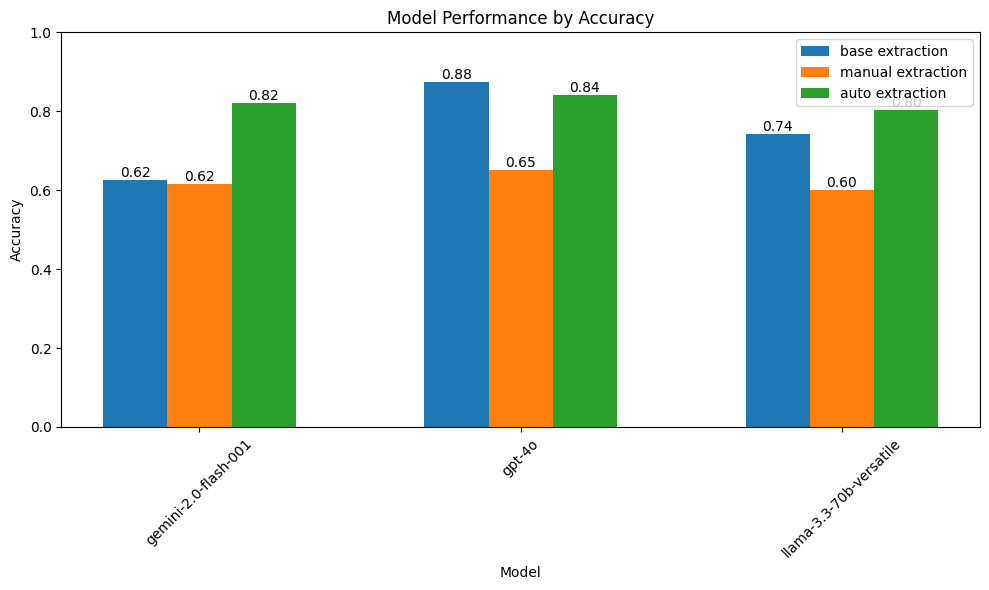

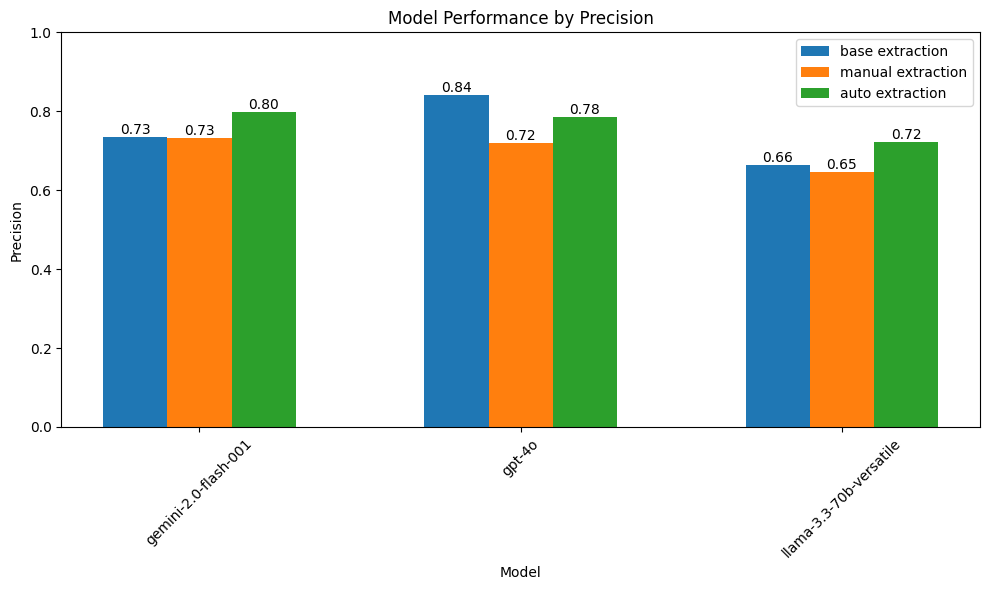

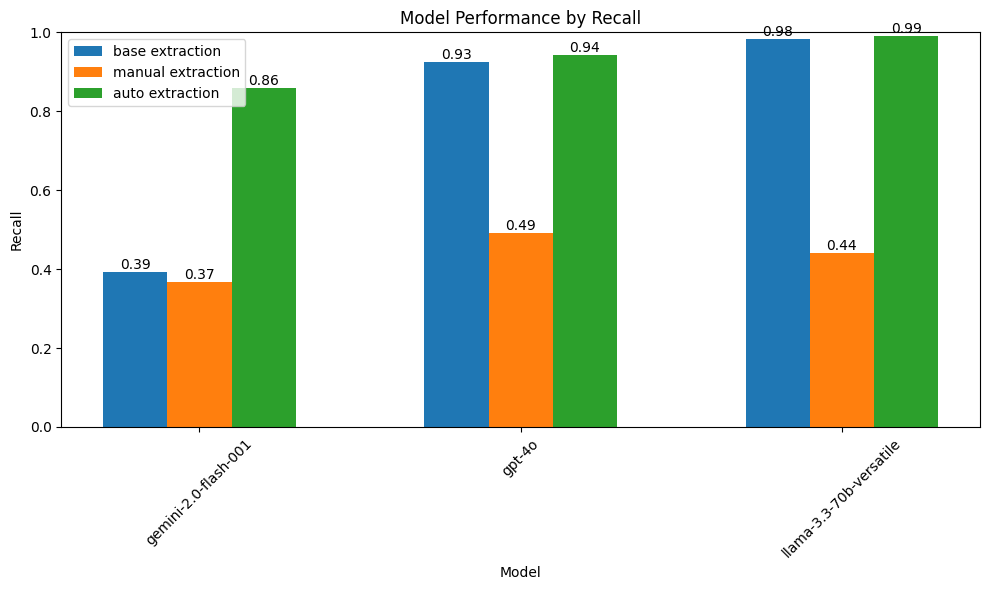

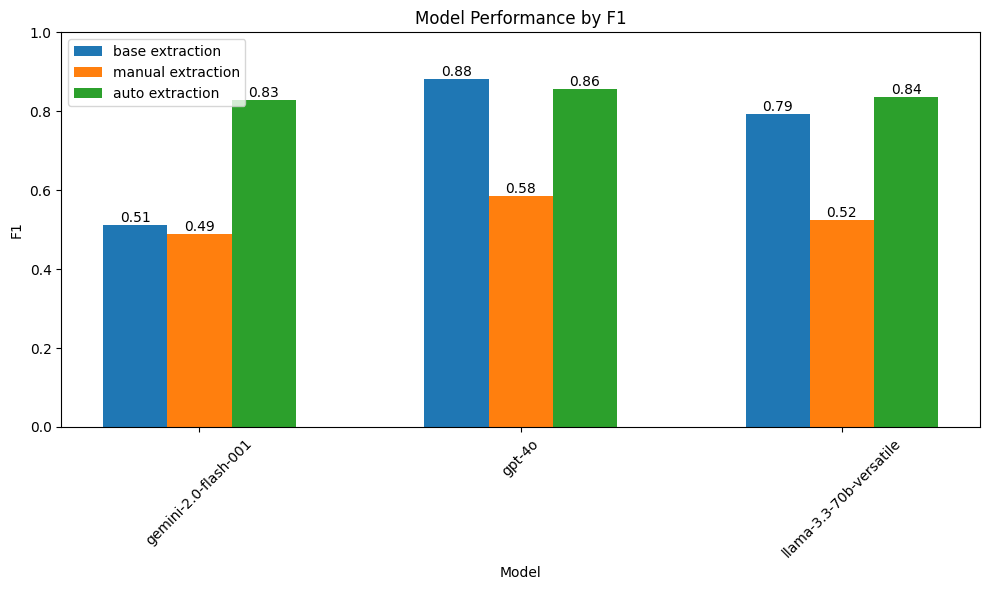

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics to plot
metrics = ['accuracy', 'precision', 'recall', 'f1']
approaches = ['base', 'manual', 'auto']

# Create a bar chart for each metric
for metric in metrics:
    plt.figure(figsize=(10, 6))
    models = [result['model'] for result in full_results]
    x = np.arange(len(models))  # the label locations
    width = 0.2  # the width of the bars

    for i, approach in enumerate(approaches):
        # Extract the metric values for each model and approach
        values = [result[approach][metric] for result in full_results]
        
        # Plot the bar chart with bars side by side
        bars = plt.bar(x + i * width, values, width, label=f'{approach} extraction')

        # Display the actual metric values on top of each bar
        for bar, value in zip(bars, values):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', 
                     ha='center', va='bottom')

    plt.title(f'Model Performance by {metric.capitalize()}')
    plt.xlabel('Model')
    plt.ylabel(metric.capitalize())
    plt.ylim(0, 1)  # Assuming metric values are between 0 and 1
    plt.xticks(x + width, models, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


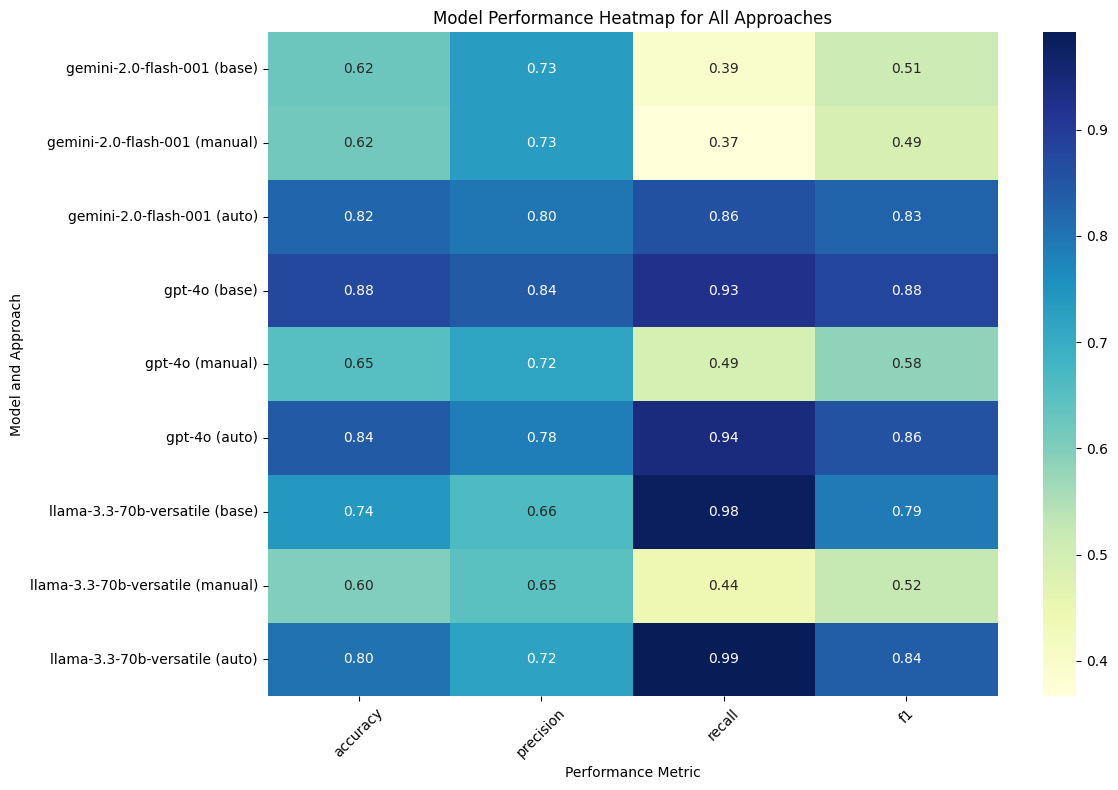

In [22]:
import seaborn as sns

# Prepare data for the heatmap with models on the y-axis and metrics on the x-axis
heatmap_data = np.array([
    [result[approach][metric] for metric in metrics] 
    for result in full_results for approach in approaches
])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".2f", 
    cmap="YlGnBu", 
    xticklabels=metrics, 
    yticklabels=[f"{model} ({approach})" for model in models for approach in approaches]
)

plt.title('Model Performance Heatmap for All Approaches')
plt.xlabel('Performance Metric')
plt.ylabel('Model and Approach')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
